In [115]:
'''To Do List
change to .json to get the Luminosity distance --DONE,
use polynomial fit --DONE,
show some graphs of fitting --DONE,
show differnce in fitting graph,
type IIP supernova,
Philips relation'''

'To Do List\nchange to .json to get the Luminosity distance --DONE,\nuse polynomial fit --DONE,\nshow some graphs of fitting --DONE,\nshow differnce in fitting graph,\ntype IIP supernova,\nPhilips relation'

In [116]:
import os
import glob
import numpy as np
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit, minimize
from lmfit import Model

In [117]:
# Import the .json file

os.chdir(r"C:\Users\ricky\JupyterNotebooks\Intern21\import_photometry_data\typeIa_photometry")
filename = glob.glob('*.json')
print(len(filename))

# Create a list for all .json, the 1st SN saved as json_data[0], the 2nd SN saved as json_data[1], etc.
json_data = []
for i in filename:
    with open(i, encoding="utf-8") as f:
        json_data.append(json.load(f))

60


In [118]:
'''To obtain absolute magnitude and time in a particular band.
For every SN.json, there may be multiple sources even within one light band,
at the end this cell will return a list of time and magnitude for every source of the same band'''

Band = [] # Contain EM band chosen for analysis
Magnitude_Abs = [] # Contain absolute magnitude
Time = [] # Contain time (day)
Type = [] # Claimed type
Sample_Count = 0 # Number of light curves obtained


for i in range(len(filename)): # Loop through all SN
    
    Source = [] # Contain different sources within a single .json
    
    Band.append([]) # Create 2D list
    
    SN_name = filename[i].replace('.json', '')
    SN_name = SN_name.replace('_', ':')
    
    Type.append(json_data[i][SN_name]['claimedtype'][0]['value'])
    
    N = len(json_data[i][SN_name]['photometry']) # The no. of data point of photometry in each SN

    for j in range(N): # Loop through all photemetry datapoint in one SN
        # Avoid any data point without band data
        try:
            Band[i].append(json_data[i][SN_name]['photometry'][j]['band'])
        except:
            Band[i].append(0)
        
        # Fill the Magnitude_Abs and Time list if the data point is in B band
        if Band[i][j] == 'B':
            
            Source.append(json_data[i][SN_name]['photometry'][j]['source']) # Obtain the sources
            Source = list(set(Source)) # Remove repetitive sources
            
    if len(Source) == 0: # Avoid empty sources
        Source.append('0') 
            
    
    # Create light curves for every sources
    for k in range(len(Source)):
        for j in range(N): # Loop through all photemetry datapoint in one source
            if (Band[i][j] == 'B') & (json_data[i][SN_name]['photometry'][j]['source'] == Source[k]):
                Magnitude_App = float(json_data[i][SN_name]['photometry'][j]['magnitude']) # Obtain the apparent magnitude from photometry
                LumDist = float(json_data[i][SN_name]['lumdist'][0]['value']) # Obtain the luminosity distance
                z = float(json_data[i][SN_name]['redshift'][0]['value']) # Obtain the redshift, z
                
                Magnitude_Abs.append([]) # Create 2D list
                Time.append([])
                
                Magnitude_Abs[Sample_Count].append(Magnitude_App - 5*np.log10(LumDist*1e5) + 2.5*np.log10(1+z)) # Calculate the absolute magnitude and fill the Magnitude_Abs list
                Time[Sample_Count].append(float(json_data[i][SN_name]['photometry'][j]['time'])) # Fill the Time list
                
        Sample_Count += 1
    
    #print(Source)
print(Sample_Count)
print(len(filename))
print(len(Time))
print(len(Magnitude_Abs))

198
60
6173
6173


id: 24 , R^2 score: 0.9812659385377006 , Time of maximum brightness: 44587.105961210786


<ipython-input-141-b6b9bf7a0c0b>:36: RuntimeWarning: divide by zero encountered in double_scalars
  slope += (Magnitude_Abs[i][l+1] - Magnitude_Abs[i][l]) / (Time[i][l+1] - Time[i][l]) # Calculate the average slope between 1st and 4th data point to select out data with rising peak only
c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-141-b6b9bf7a0c0b>:36: RuntimeWarning: divide by zero encountered in double_scalars
  slope += (Magnitude_Abs[i][l+1] - Magnitude_Abs[i][l]) / (Time[i][l+1] - Time[i][l]) # Calculate the average slope between 1st and 4th data point to select out data with rising peak only


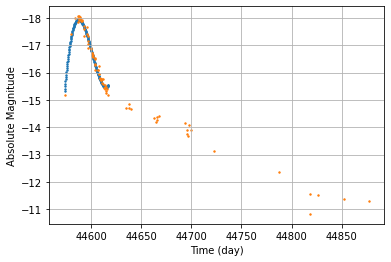

id: 40 , R^2 score: 0.9860339518464781 , Time of maximum brightness: 47562.987119837766


<ipython-input-141-b6b9bf7a0c0b>:36: RuntimeWarning: divide by zero encountered in double_scalars
  slope += (Magnitude_Abs[i][l+1] - Magnitude_Abs[i][l]) / (Time[i][l+1] - Time[i][l]) # Calculate the average slope between 1st and 4th data point to select out data with rising peak only


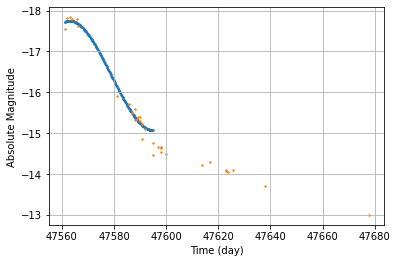

<ipython-input-141-b6b9bf7a0c0b>:36: RuntimeWarning: divide by zero encountered in double_scalars
  slope += (Magnitude_Abs[i][l+1] - Magnitude_Abs[i][l]) / (Time[i][l+1] - Time[i][l]) # Calculate the average slope between 1st and 4th data point to select out data with rising peak only


id: 43 , R^2 score: 0.9977991508256813 , Time of maximum brightness: 48082.47630816442


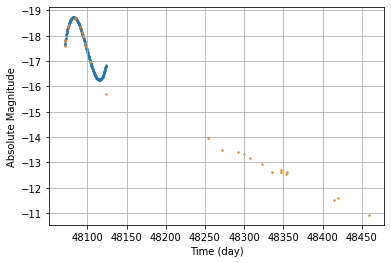

id: 44 , R^2 score: 0.9841555858604387 , Time of maximum brightness: 49685.95760891183


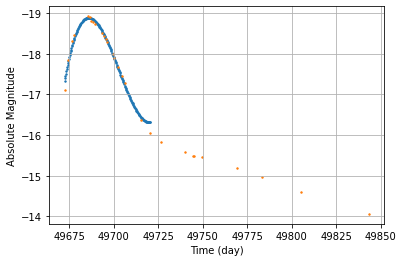

id: 45 , R^2 score: 0.986980365227126 , Time of maximum brightness: 49686.09914949713


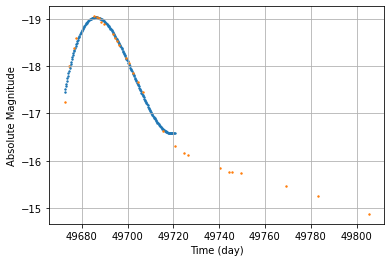

id: 57 , R^2 score: 0.998172866909977 , Time of maximum brightness: 49432.522931395055


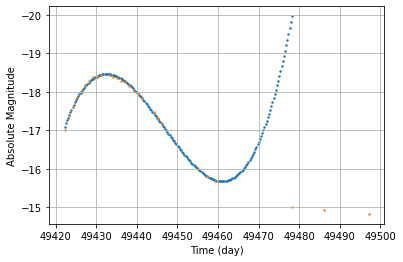

id: 58 , R^2 score: 0.9978327136264078 , Time of maximum brightness: 50952.61091994076


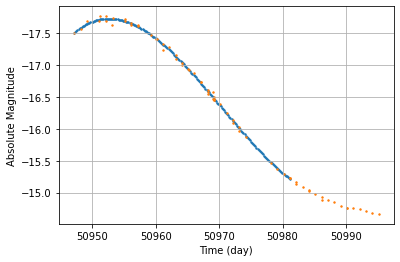

id: 59 , R^2 score: 0.9974047555479677 , Time of maximum brightness: 50950.26947029626


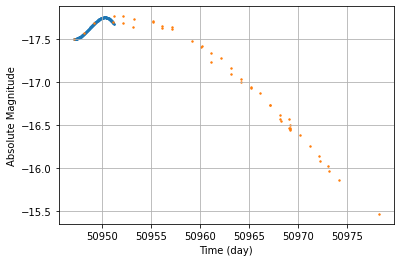

id: 60 , R^2 score: 0.9998753394977047 , Time of maximum brightness: 50952.61142160242


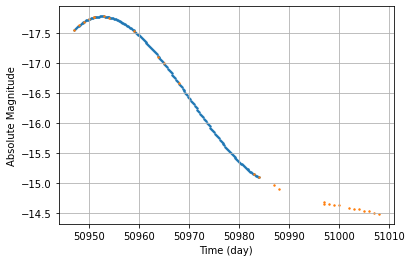

id: 61 , R^2 score: 0.9458564173620204 , Time of maximum brightness: 50952.832835919995


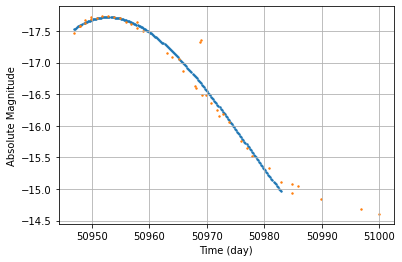

id: 64 , R^2 score: 0.9905667103895971 , Time of maximum brightness: 51753.4052890028


<ipython-input-141-b6b9bf7a0c0b>:36: RuntimeWarning: divide by zero encountered in double_scalars
  slope += (Magnitude_Abs[i][l+1] - Magnitude_Abs[i][l]) / (Time[i][l+1] - Time[i][l]) # Calculate the average slope between 1st and 4th data point to select out data with rising peak only
<ipython-input-141-b6b9bf7a0c0b>:36: RuntimeWarning: divide by zero encountered in double_scalars
  slope += (Magnitude_Abs[i][l+1] - Magnitude_Abs[i][l]) / (Time[i][l+1] - Time[i][l]) # Calculate the average slope between 1st and 4th data point to select out data with rising peak only


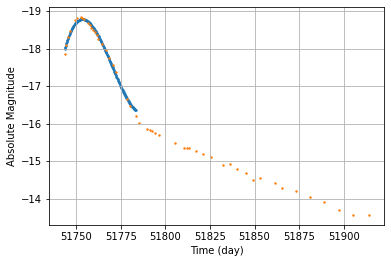

id: 65 , R^2 score: 0.9913885614090922 , Time of maximum brightness: 51753.33581967348


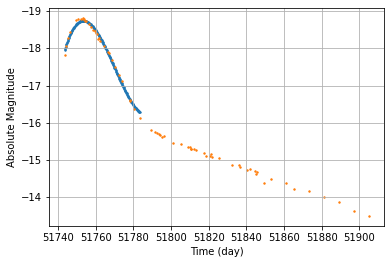

id: 70 , R^2 score: 0.9895120220703599 , Time of maximum brightness: 51753.32729406945


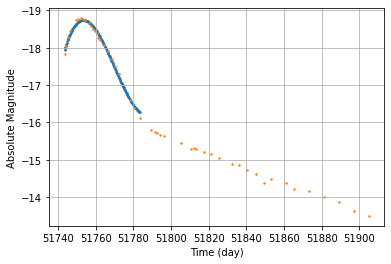

id: 73 , R^2 score: 0.9858011582391143 , Time of maximum brightness: 51577.601927941454


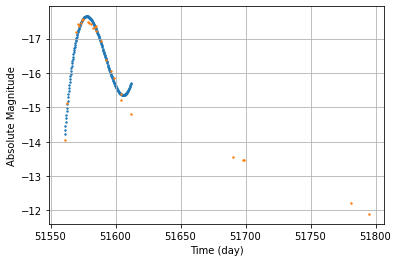

id: 75 , R^2 score: 0.9858359833863348 , Time of maximum brightness: 51577.6005626794


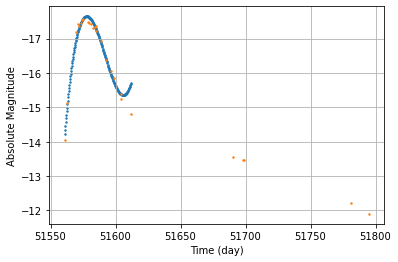

id: 77 , R^2 score: 0.9984820700175056 , Time of maximum brightness: 52182.45260325957


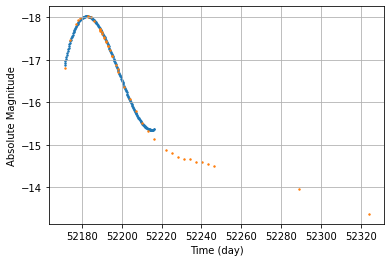

id: 78 , R^2 score: 0.9983686770972127 , Time of maximum brightness: 52182.45636825302


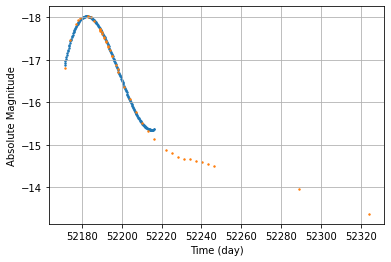

id: 79 , R^2 score: 0.9889931926450611 , Time of maximum brightness: 52524.82936123753


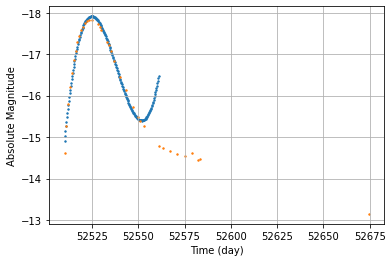

id: 83 , R^2 score: 0.9944203663317033 , Time of maximum brightness: 52548.57962662517


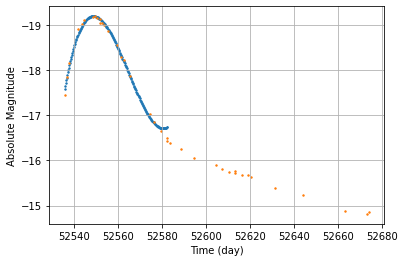

id: 85 , R^2 score: 0.9984670242652374 , Time of maximum brightness: 52729.019869440854


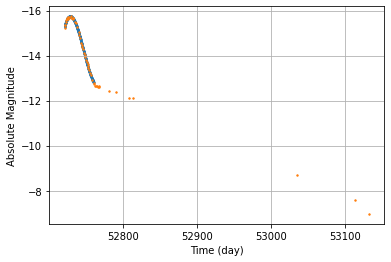

id: 89 , R^2 score: 0.9926604706325782 , Time of maximum brightness: 52766.52662636367


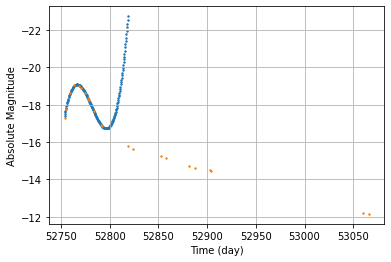

id: 90 , R^2 score: 0.9971461077828989 , Time of maximum brightness: 52766.40172074341


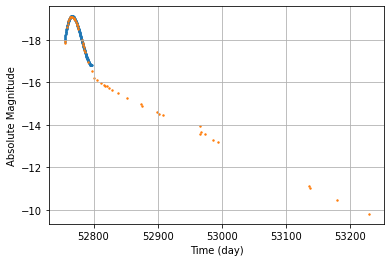

id: 92 , R^2 score: 0.9964903532034527 , Time of maximum brightness: 53278.379800448936


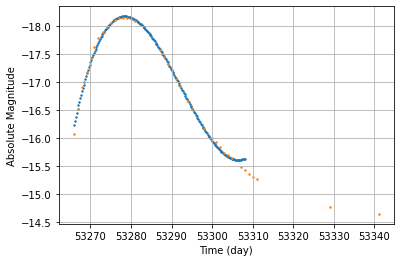

id: 93 , R^2 score: 0.9978303150655166 , Time of maximum brightness: 53278.28935139989


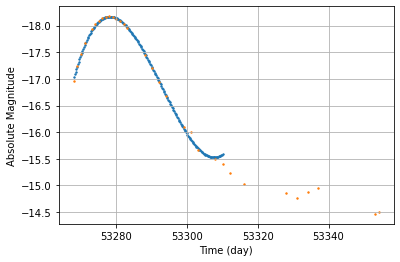

id: 94 , R^2 score: 0.997893123845253 , Time of maximum brightness: 53278.34111676125


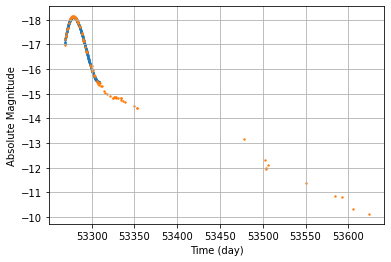

id: 96 , R^2 score: 0.9983362127584817 , Time of maximum brightness: 53354.880584048704


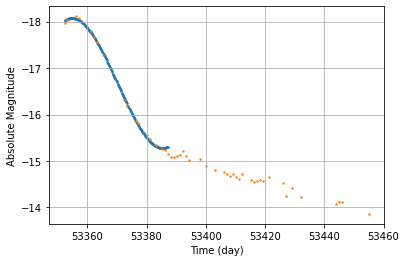

id: 100 , R^2 score: 0.9996197814942368 , Time of maximum brightness: 53436.88507128002


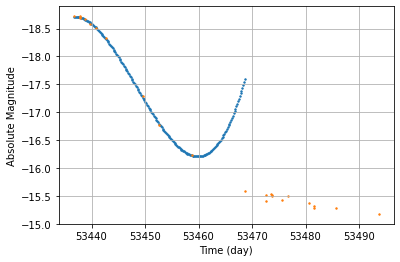

id: 102 , R^2 score: 0.9920876015641 , Time of maximum brightness: 53534.4269122355


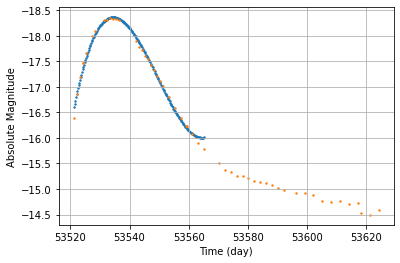

id: 105 , R^2 score: 0.9997013158522995 , Time of maximum brightness: 53646.85624730686


<ipython-input-141-b6b9bf7a0c0b>:36: RuntimeWarning: divide by zero encountered in double_scalars
  slope += (Magnitude_Abs[i][l+1] - Magnitude_Abs[i][l]) / (Time[i][l+1] - Time[i][l]) # Calculate the average slope between 1st and 4th data point to select out data with rising peak only


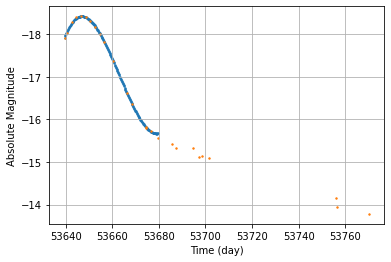

id: 106 , R^2 score: 0.999903127706629 , Time of maximum brightness: 53646.95256161747


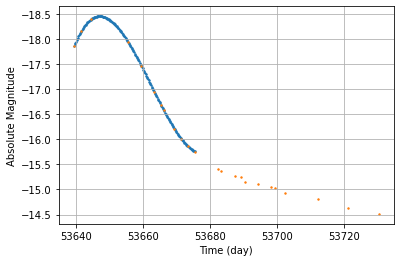

id: 107 , R^2 score: 0.999261572419773 , Time of maximum brightness: 53646.63981585225


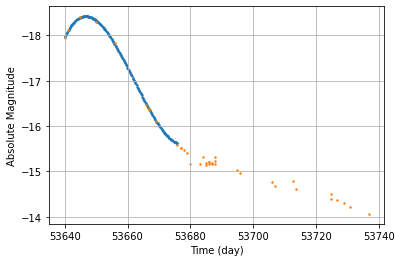

id: 108 , R^2 score: 0.9998841380382552 , Time of maximum brightness: 53666.64028852612


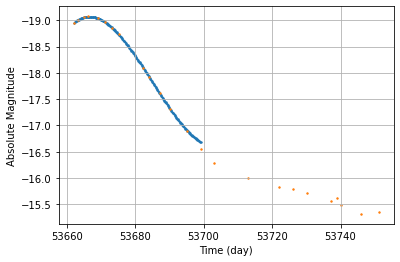

id: 110 , R^2 score: 0.994876867812633 , Time of maximum brightness: 53705.0511289206


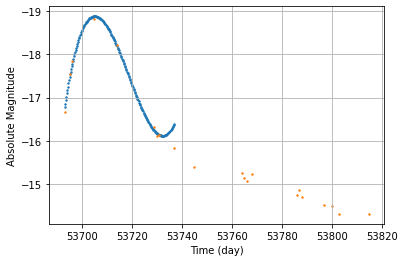

id: 111 , R^2 score: 0.9919570170508235 , Time of maximum brightness: 53705.035882135446


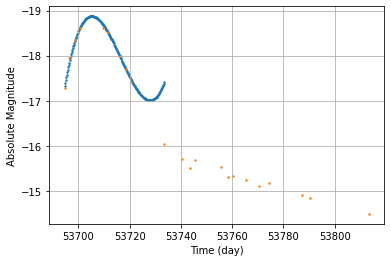

id: 112 , R^2 score: 0.9989101406813568 , Time of maximum brightness: 53705.77894915946


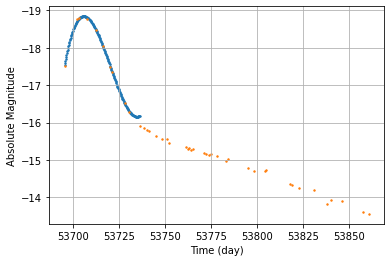

id: 116 , R^2 score: 0.9976605117938443 , Time of maximum brightness: 53826.95763552227


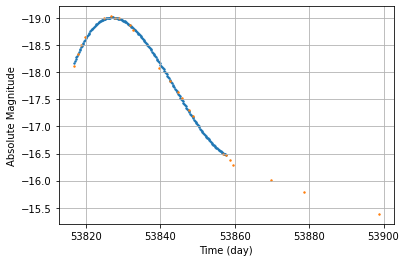

id: 117 , R^2 score: 0.9933635648531317 , Time of maximum brightness: 53827.38898160787


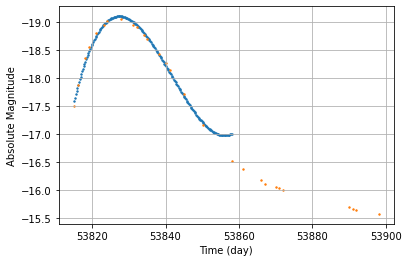

id: 119 , R^2 score: 0.9988433491015117 , Time of maximum brightness: 53757.24867208616


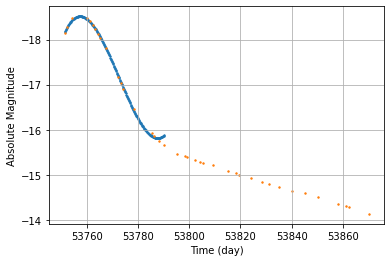

id: 121 , R^2 score: 0.992775481547383 , Time of maximum brightness: 54047.2829480654


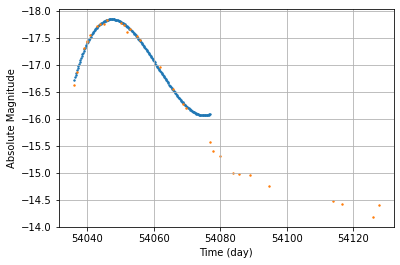

id: 123 , R^2 score: 0.9961657874269091 , Time of maximum brightness: 54174.509981426454


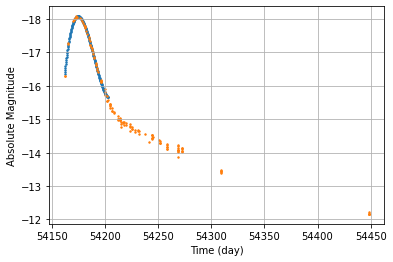

id: 124 , R^2 score: 0.9993850399461013 , Time of maximum brightness: 54174.254806022625


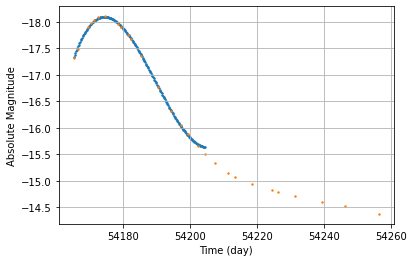

id: 125 , R^2 score: 0.9982161192202235 , Time of maximum brightness: 54174.64196057587


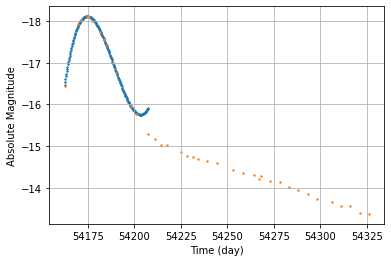

id: 126 , R^2 score: 0.9989521633884381 , Time of maximum brightness: 54173.86553369016


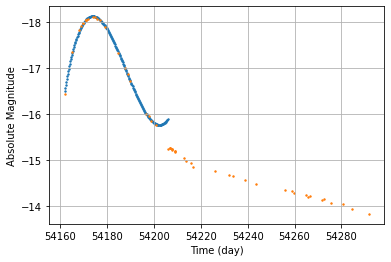

id: 133 , R^2 score: 0.9881375542775244 , Time of maximum brightness: 54419.50943430511


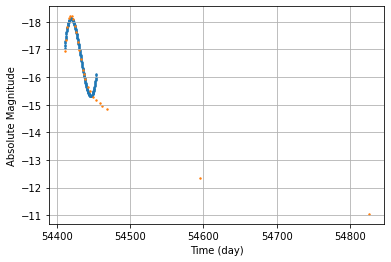

id: 134 , R^2 score: 0.9920318108217843 , Time of maximum brightness: 54419.43409229001


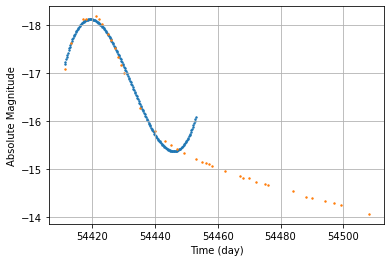

id: 146 , R^2 score: 0.9959016302626583 , Time of maximum brightness: 54817.4807114607


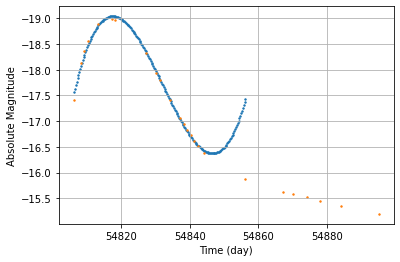

id: 147 , R^2 score: 0.9876814743838731 , Time of maximum brightness: 54816.41350823772


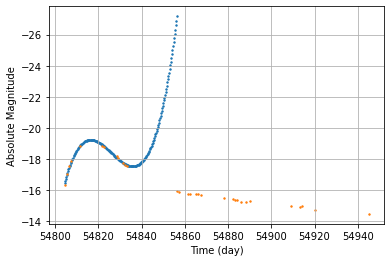

id: 152 , R^2 score: 0.9952819096514137 , Time of maximum brightness: 55691.24228957932


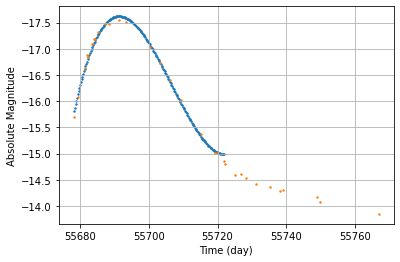

id: 153 , R^2 score: 0.9977504821726386 , Time of maximum brightness: 55691.28614127045


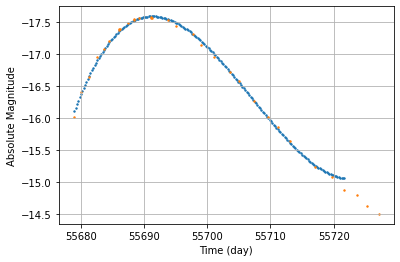

id: 154 , R^2 score: 0.9758069005906949 , Time of maximum brightness: 55815.59322847042


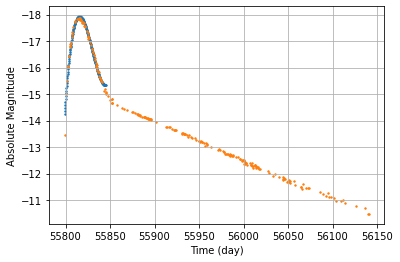

id: 155 , R^2 score: 0.9821682299968814 , Time of maximum brightness: 55815.53625002786


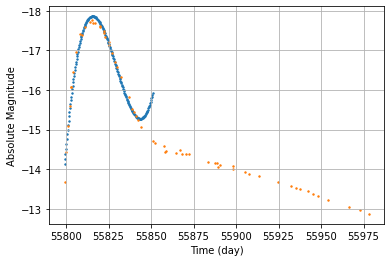

id: 156 , R^2 score: 0.9760619943288263 , Time of maximum brightness: 55815.30969506337


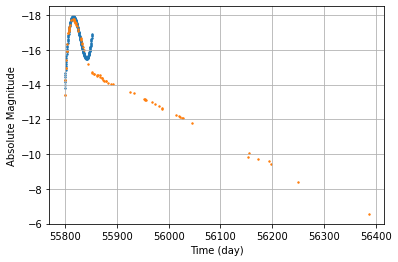

id: 158 , R^2 score: 0.9952506921564442 , Time of maximum brightness: 55812.730834940776


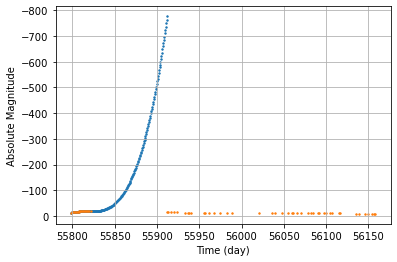

id: 159 , R^2 score: 0.9725294915467722 , Time of maximum brightness: 56082.78407654706


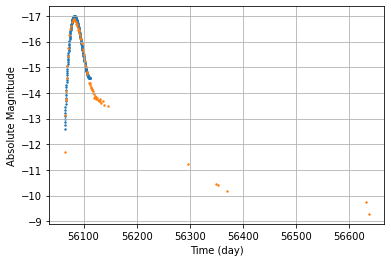

id: 160 , R^2 score: 0.9988520866241888 , Time of maximum brightness: 56082.381516181595


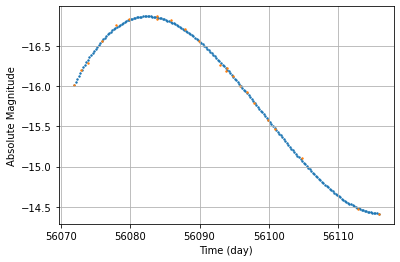

id: 161 , R^2 score: 0.9968859729584155 , Time of maximum brightness: 56081.04322297581


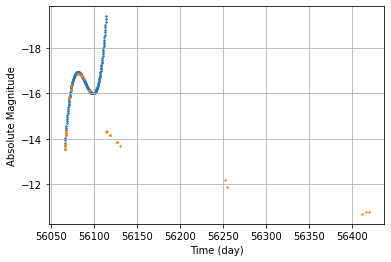

id: 162 , R^2 score: 0.9970074486928028 , Time of maximum brightness: 56080.35824293661


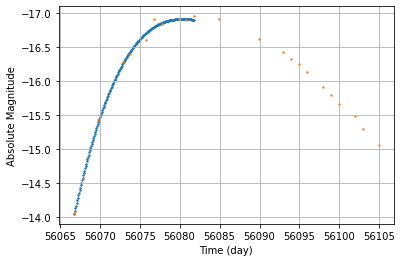

id: 163 , R^2 score: 0.9481976221086137 , Time of maximum brightness: 56244.63856504506


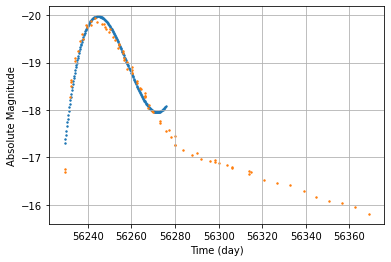

id: 164 , R^2 score: 0.9275240881253428 , Time of maximum brightness: 56244.04563942539


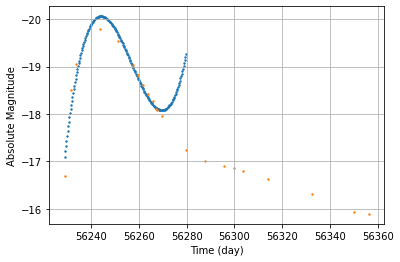

id: 165 , R^2 score: 0.9806354729170675 , Time of maximum brightness: 56243.95122161964


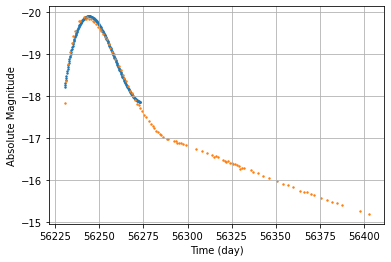

id: 166 , R^2 score: 0.9641701210450233 , Time of maximum brightness: 56244.21961140031


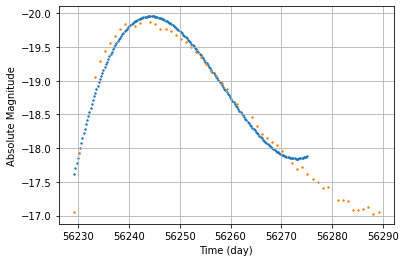

id: 168 , R^2 score: 0.9910354108500044 , Time of maximum brightness: 56295.87159994777


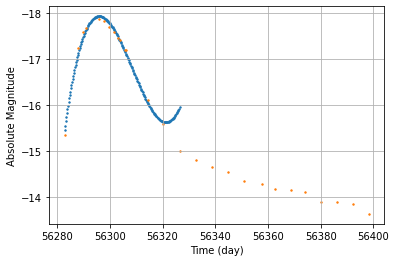

id: 170 , R^2 score: 0.9924472114697022 , Time of maximum brightness: 56296.25441447535


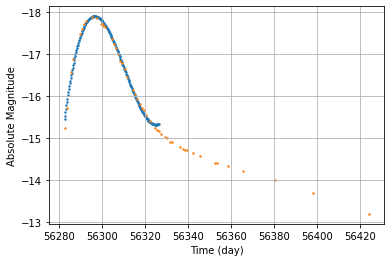

id: 173 , R^2 score: 0.9879245354593078 , Time of maximum brightness: 56528.93856627682


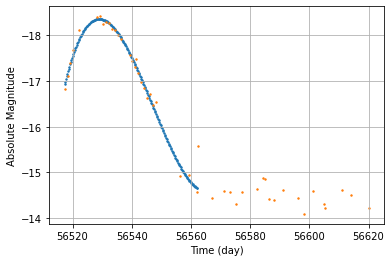

id: 175 , R^2 score: 0.988801127627324 , Time of maximum brightness: 56528.69643530347


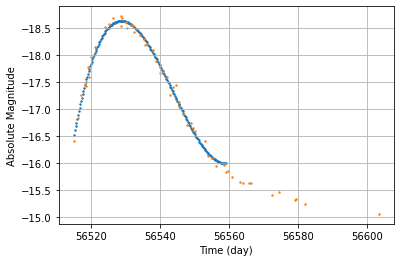

id: 177 , R^2 score: 0.9945813510634176 , Time of maximum brightness: 56648.64978601443


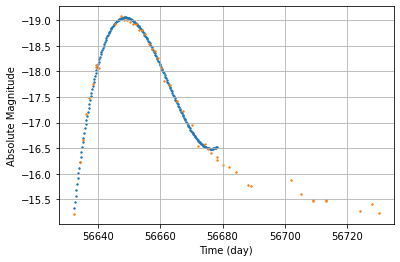

id: 178 , R^2 score: 0.9958069487567592 , Time of maximum brightness: 56648.5791303302


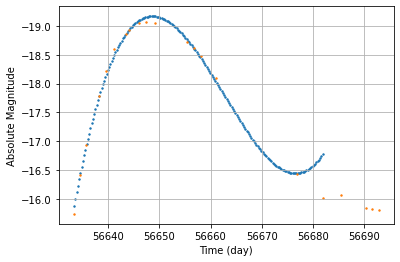

id: 179 , R^2 score: 0.9860252694903578 , Time of maximum brightness: 57107.36654776084


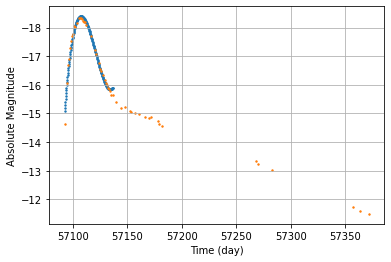

id: 181 , R^2 score: 0.9868952038479378 , Time of maximum brightness: 57106.97111040237


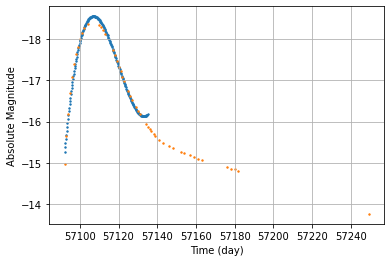

id: 182 , R^2 score: 0.9923082906512387 , Time of maximum brightness: 57548.27005376114


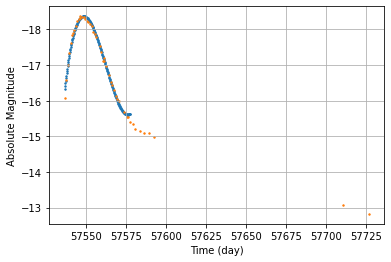

id: 187 , R^2 score: 0.9953911218390744 , Time of maximum brightness: 57709.66185242889


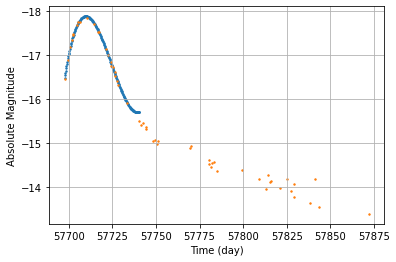

id: 188 , R^2 score: 0.9935056203290417 , Time of maximum brightness: 57890.47110287633


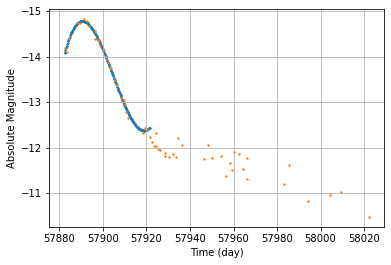

id: 190 , R^2 score: 0.9911819393337068 , Time of maximum brightness: 57935.16222924518


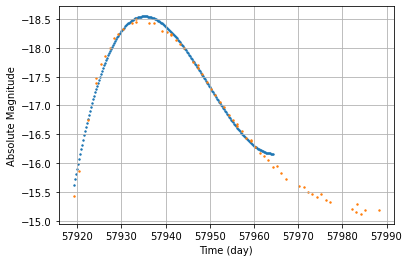

id: 194 , R^2 score: 0.9941783377333921 , Time of maximum brightness: 58045.68124561917


<ipython-input-141-b6b9bf7a0c0b>:31: RuntimeWarning: invalid value encountered in double_scalars
  Time_max.append((-1*P[2] + ((P[2])**2 - 3*P[3]*P[1])**(1/2))/(3*P[3]))


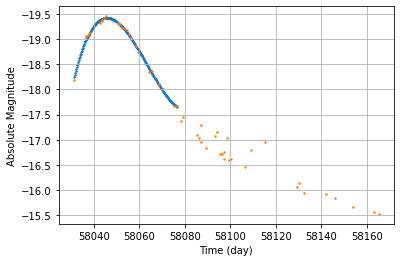

id: 196 , R^2 score: 0.9975787623935282 , Time of maximum brightness: 58150.00272917326


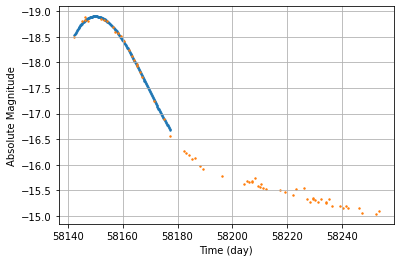

[24, 40, 43, 44, 45, 57, 58, 59, 60, 61, 64, 65, 70, 73, 75, 77, 78, 79, 83, 85, 89, 90, 92, 93, 94, 96, 100, 102, 105, 106, 107, 108, 110, 111, 112, 116, 117, 119, 121, 123, 124, 125, 126, 133, 134, 146, 147, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 173, 175, 177, 178, 179, 181, 182, 187, 188, 190, 194, 196]


In [141]:
# Peak fitting

from sklearn.metrics import r2_score
Succ_graph = [] # Save the number of successfully fitted graph
Time_max = [] # Save the day of maximum magnitude
fitting_days = 30 # Num of days after the maximum used for peak fitting from the peak

for i in range(Sample_Count): # Loop through all SN
    if len(Time[i]) > 20: # Avoid empty list
        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude
        peak_time = Time[i][maximum] # Save the day of maximum magnitude
        tail_time = Time[i][maximum] # Save the day of the end of the initial lightcurve fall off
        
        # Calculate the day of the end of the initial lightcurve fall off
        j = 0
        if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
            while tail_time < (peak_time + fitting_days):
                tail_time = Time[i][maximum + j]
                if tail_time > (peak_time + fitting_days):
                    break
                j += 1
        
        # Save the peaking part of the light curve
        t = Time[i][:maximum + j]
        m = Magnitude_Abs[i][:maximum + j]
        
        # Polynomial (degree = 3) fit of the peak part of the light curve 
        P = np.poly1d(np.polyfit(t, m, deg = 3))
        
        # Save the time of maximum magnitude
        Time_max.append((-1*P[2] + ((P[2])**2 - 3*P[3]*P[1])**(1/2))/(3*P[3]))
        
        slope = 0
        
        for l in range(3): # Maybe try to use polynomial fit and check if minimum exist?
            slope += (Magnitude_Abs[i][l+1] - Magnitude_Abs[i][l]) / (Time[i][l+1] - Time[i][l]) # Calculate the average slope between 1st and 4th data point to select out data with rising peak only
        
        if (r2_score(m, P(t)) > 0.8) & (not math.isnan(Time_max[-1])) & (slope < 0):
            
            print('id:', i, ', R^2 score:', r2_score(m, P(t)), ', Time of maximum brightness:', Time_max[i])
            
            # Print the graph of fitting
            X = np.linspace(Time[i][0], Time[i][maximum + j], 200)
            Y = P(X)
            plt.gca().invert_yaxis()
            plt.grid()
            plt.xlabel('Time (day)')
            plt.ylabel('Absolute Magnitude')
            #plt.xlim(Time[i][0] - 10, Time[i][maximum + j] + 50)
            plt.scatter(X, Y, s=2)
            plt.scatter(Time[i], Magnitude_Abs[i], s=2)
            plt.show()
            
            Succ_graph.append(i)
        
    else:
        Time_max.append(0)

print(Succ_graph)

In [120]:
'''def expconv(xrange, lamb, sigma, offset, A):    
    piece1 = A/(2*lamb)
    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) - (xrange-offset)/lamb)
    piece3 = sp.special.erfc(sigma/((np.sqrt(2)*lamb)) - (xrange-offset)/(np.sqrt(2)*sigma))
    print('expconv result', piece1*piece2*piece3)
    return piece1*piece2*piece3

def cost(x, x_axis, datapoint_value):
    return np.sum((expconv(x_axis, x[0], x[1], x[2], x[3]) - datapoint_value)**2)

# Peak fitting

from sklearn.metrics import r2_score
Succ_graph = [] # Save the number of successfully fitted graph
Time_max = [] # Save the day of maximum magnitude
fitting_days = 30 # Num of days after the maximum used for peak fitting from the peak

for i in range(Sample_Count): # Loop through all SN
    if len(Time[i]) > 10: # Avoid empty list
        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude
        peak_time = Time[i][maximum] # Save the day of maximum magnitude
        tail_time = Time[i][maximum] # Save the day of the end of the initial lightcurve fall off
        
        # Calculate the day of the end of the initial lightcurve fall off
        j = 0
        if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
            while tail_time < (peak_time + fitting_days):
                tail_time = Time[i][maximum + j]
                if tail_time > (peak_time + fitting_days):
                    break
                j += 1
        
        # Save the peaking part of the light curve
        t = Time[i][:maximum + j]
        m = Magnitude_Abs[i][:maximum + j]
        
        lamb_guess = 2
        sigma_guess = 3
        offset_guess = Time[i][maximum]
        A_guess = 5
        guesses = [lamb_guess, sigma_guess, offset_guess, A_guess]
        
        res = minimize(cost, guesses, args = (t, np.exp(m)), method = 'BFGS')
        print(res)
        #print(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))
        
        # Save the time of maximum magnitude
        Time_max.append(res.x[2])
        
        print('id:', i, ', SN:', filename[i], ', R^2 score:', r2_score(m, np.log10(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))), ', Time of maximum brightness:', Time_max[i])
        
        # Print the graph of fitting
        X = np.linspace(Time[i][0], Time[i][maximum + j], len(t))
        Y = np.log10(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))
        plt.gca().invert_yaxis()
        plt.grid()
        plt.xlabel('Time (day)')
        plt.ylabel('Absolute Magnitude')
        plt.xlim(Time[i][0] - 10, Time[i][maximum + j] + 50)
        plt.scatter(X, Y, s=2)
        plt.scatter(Time[i], Magnitude_Abs[i], s=2)
        plt.show()
    
        if r2_score(m, np.log10(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))) > 0.8:
            Succ_graph.append(i)
        
    else:
        Time_max.append(0)


print(Succ_graph)'''

"def expconv(xrange, lamb, sigma, offset, A):    \n    piece1 = A/(2*lamb)\n    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) - (xrange-offset)/lamb)\n    piece3 = sp.special.erfc(sigma/((np.sqrt(2)*lamb)) - (xrange-offset)/(np.sqrt(2)*sigma))\n    print('expconv result', piece1*piece2*piece3)\n    return piece1*piece2*piece3\n\ndef cost(x, x_axis, datapoint_value):\n    return np.sum((expconv(x_axis, x[0], x[1], x[2], x[3]) - datapoint_value)**2)\n\n# Peak fitting\n\nfrom sklearn.metrics import r2_score\nSucc_graph = [] # Save the number of successfully fitted graph\nTime_max = [] # Save the day of maximum magnitude\nfitting_days = 30 # Num of days after the maximum used for peak fitting from the peak\n\nfor i in range(Sample_Count): # Loop through all SN\n    if len(Time[i]) > 10: # Avoid empty list\n        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude\n        peak_time = Time[i][maximum] # Save the day of maximum magnitude\n        tail_time = Time[i][

In [142]:
Time_shifted = [] # Save the shifted time list for better result demonstration (All light curve peaking at day 0)

for i in range(Sample_Count):
    Time_shifted.append([]) # Create 2D list
    diff = Time_max[i] - Time_max[0] 
    for j in range(len(Time[i])): # Calculate the shifted time list
        Time_shifted[i].append(Time[i][j] - diff - Time_max[0])

print(len(Time_shifted))

198


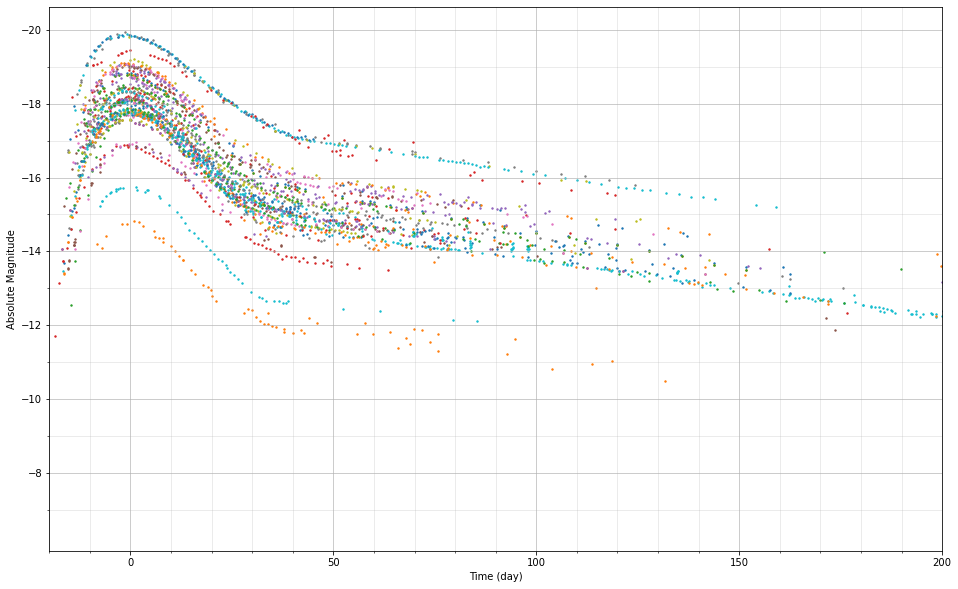

In [143]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1, 1, 1)

plt.gca().invert_yaxis()

# Major ticks every 20, minor ticks every 5
major_ticks_x = np.arange(-50, 600, 50)
minor_ticks_x = np.arange(-50, 600, 10)

major_ticks_y = np.arange(-22, -6, 2)
minor_ticks_y = np.arange(-22, -6, 1)


ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)

ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

# And a corresponding grid
ax.grid(which='major', alpha=0.8)
ax.grid(which='minor', alpha=0.3)

plt.xlabel('Time (day)')
plt.ylabel('Absolute Magnitude')

plt.xlim(-20, 200)
#plt.ylim(-12, -21)

for i in range(len(Succ_graph)):
    plt.scatter(Time_shifted[Succ_graph[i]], Magnitude_Abs[Succ_graph[i]], s=2)

-17.9403076171875 1.4305953979492188 44587.105961210786 0.9812659385377006


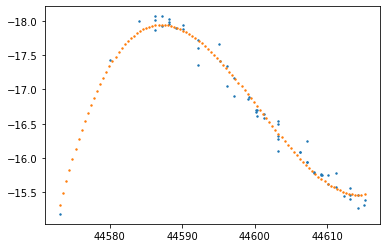

-17.753707885742188 1.2218818664550781 47562.987119837766 0.9860339518464781


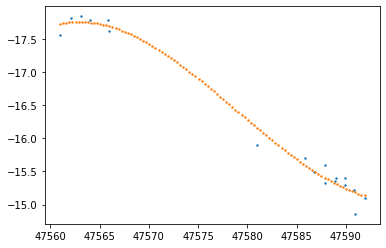

-18.73021125793457 1.0692214965820312 48082.47630816442 0.9977991508256813


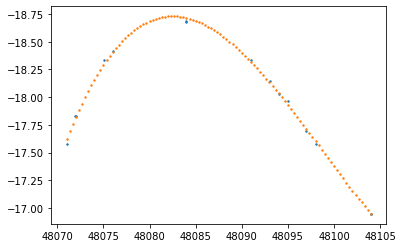

-18.885021209716797 1.0682086944580078 49685.95760891183 0.9841555858604387


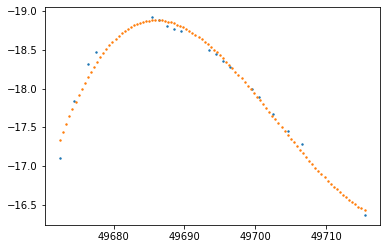

-19.029842376708984 1.0488567352294922 49686.09914949713 0.986980365227126


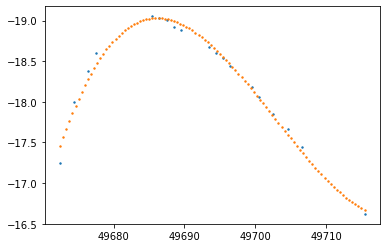

-18.465572357177734 1.504180908203125 49432.522931395055 0.998172866909977


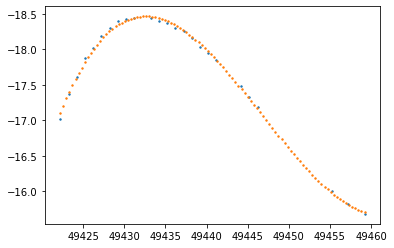

-17.727779388427734 1.0702285766601562 50952.61091994076 0.9978327136264078


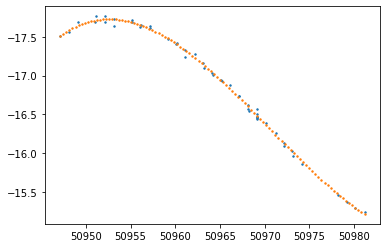

-17.77024269104004 1.0675067901611328 50952.61142160242 0.9998753394977047


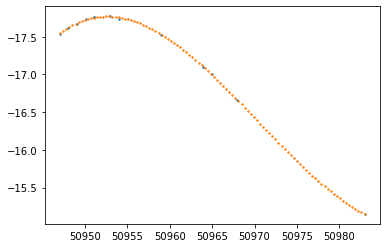

-17.721086502075195 0.9254798889160156 50952.832835919995 0.9458564173620204


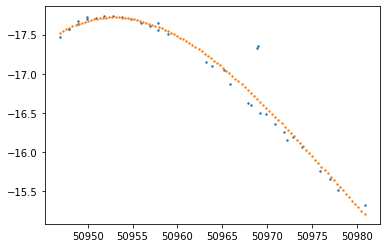

-18.787376403808594 1.0674667358398438 51753.4052890028 0.9905667103895971


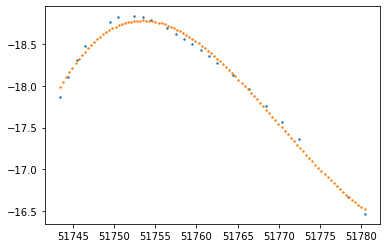

-18.742328643798828 1.0759239196777344 51753.33581967348 0.9913885614090922


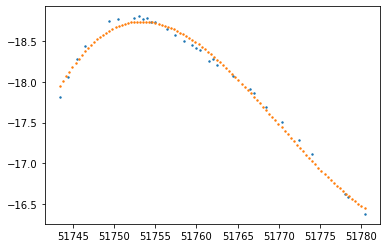

-18.738601684570312 1.0801277160644531 51753.32729406945 0.9895120220703599


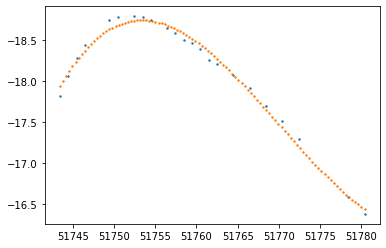

-17.651355743408203 1.2560348510742188 51577.601927941454 0.9858011582391143


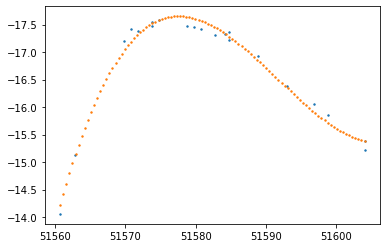

-17.651451110839844 1.2560195922851562 51577.6005626794 0.9858359833863348


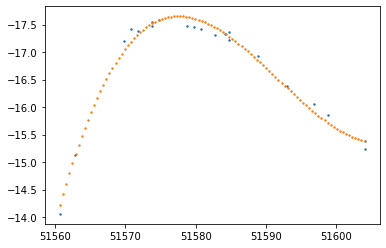

-18.027915954589844 1.18170166015625 52182.45260325957 0.9984820700175056


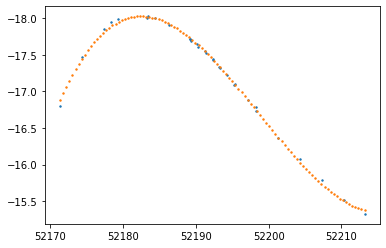

-18.028335571289062 1.1830902099609375 52182.45636825302 0.9983686770972127


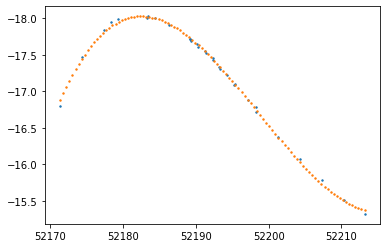

-17.917076110839844 1.4643325805664062 52524.82936123753 0.9889931926450611


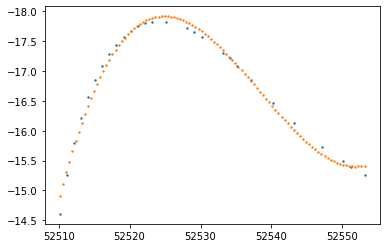

-19.205551147460938 1.1363792419433594 52548.57962662517 0.9944203663317033


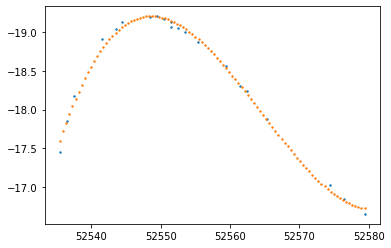

-15.748882293701172 1.14312744140625 52729.019869440854 0.9984670242652374


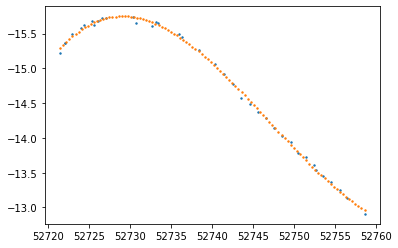

-19.082202911376953 1.1876220703125 52766.52662636367 0.9926604706325782


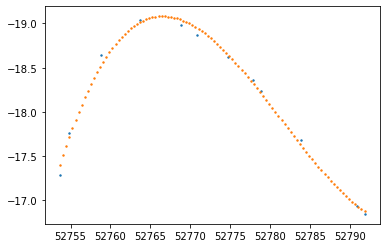

-19.109607696533203 1.096923828125 52766.40172074341 0.9971461077828989


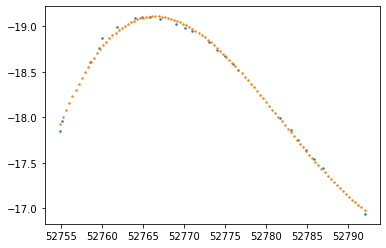

-18.18305206298828 1.4196624755859375 53278.379800448936 0.9964903532034527


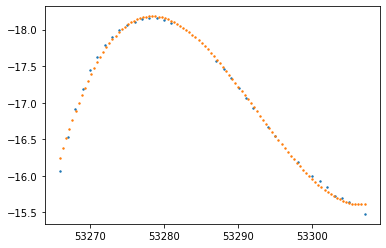

-18.167957305908203 1.360260009765625 53278.28935139989 0.9978303150655166


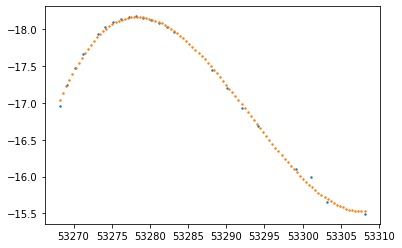

-18.118465423583984 1.3221015930175781 53278.34111676125 0.997893123845253


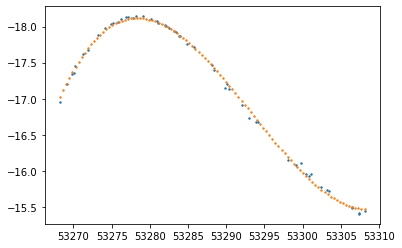

-18.079204559326172 1.3656005859375 53354.880584048704 0.9983362127584817


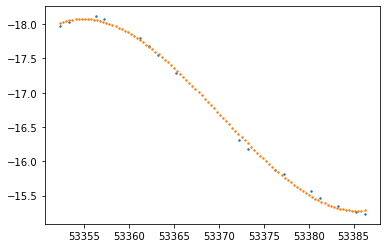

-18.713058471679688 1.8098678588867188 53436.88507128002 0.9996197814942368


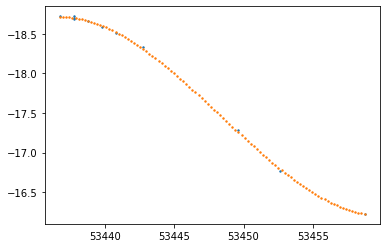

-18.364524841308594 1.180145263671875 53534.4269122355 0.9920876015641


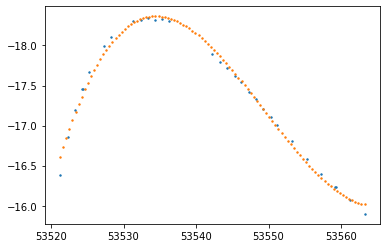

-18.424152374267578 1.2416725158691406 53646.85624730686 0.9997013158522995


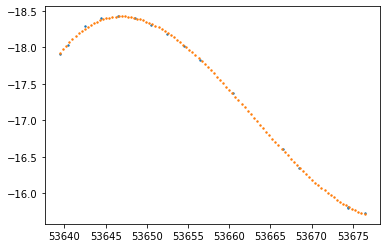

-18.455509185791016 1.329742431640625 53646.95256161747 0.999903127706629


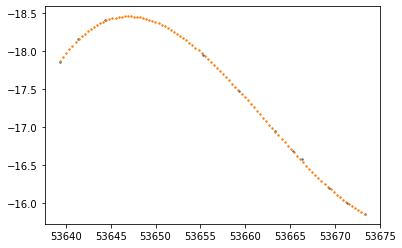

-18.422805786132812 1.3569450378417969 53646.63981585225 0.999261572419773


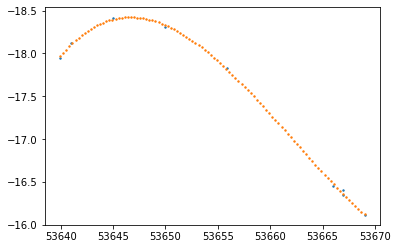

-19.070444107055664 0.9055538177490234 53666.64028852612 0.9998841380382552


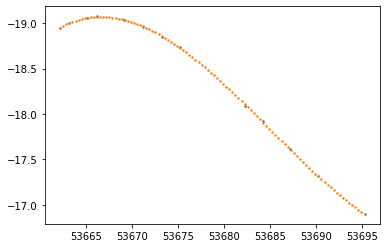

-18.876220703125 1.588653564453125 53705.0511289206 0.994876867812633


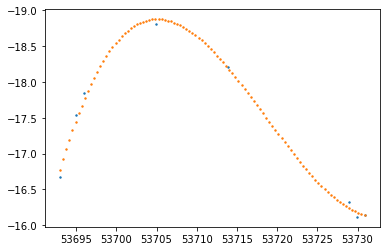

-18.873245239257812 1.3610076904296875 53705.035882135446 0.9919570170508235


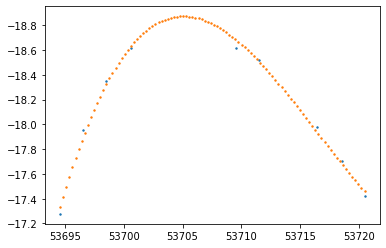

-18.84088134765625 1.4198760986328125 53705.77894915946 0.9989101406813568


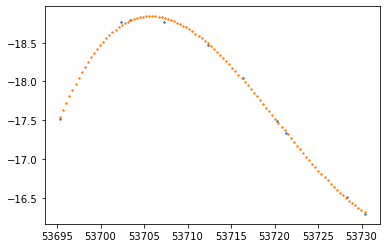

-19.00937271118164 1.0841064453125 53826.95763552227 0.9976605117938443


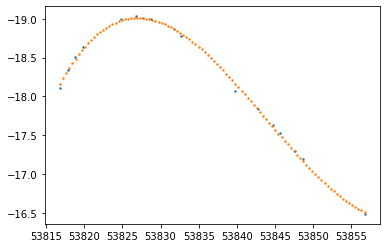

-19.102645874023438 1.1443672180175781 53827.38898160787 0.9933635648531317


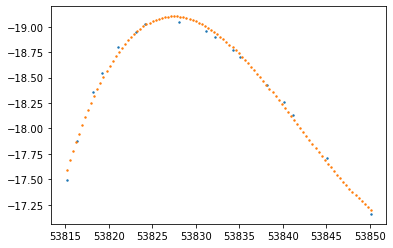

-18.51752471923828 1.3207206726074219 53757.24867208616 0.9988433491015117


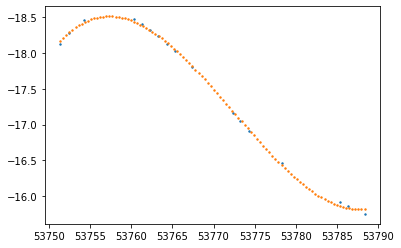

-17.847156524658203 0.9964103698730469 54047.2829480654 0.992775481547383


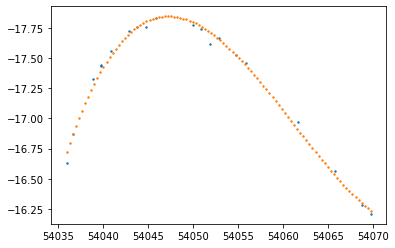

-18.080421447753906 1.2353553771972656 54174.509981426454 0.9961657874269091


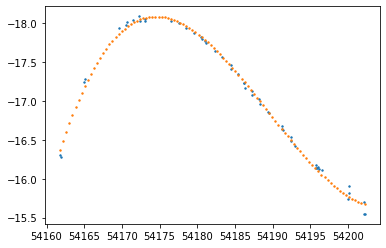

-18.098255157470703 1.1891326904296875 54174.254806022625 0.9993850399461013


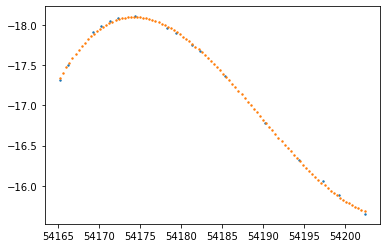

-18.116397857666016 1.2643356323242188 54174.64196057587 0.9982161192202235


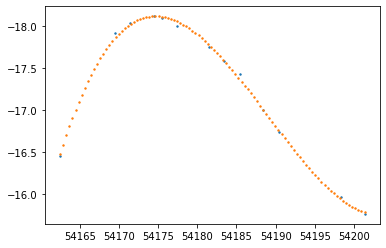

-18.122905731201172 1.27801513671875 54173.86553369016 0.9989521633884381


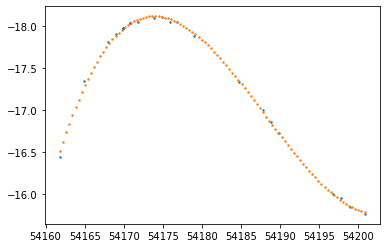

-18.12353515625 1.640716552734375 54419.50943430511 0.9881375542775244


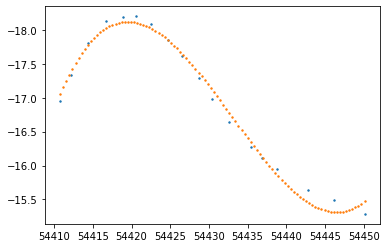

-18.11627960205078 1.6378097534179688 54419.43409229001 0.9920318108217843


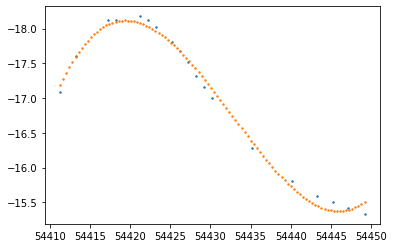

-19.039764404296875 1.3895416259765625 54817.4807114607 0.9959016302626583


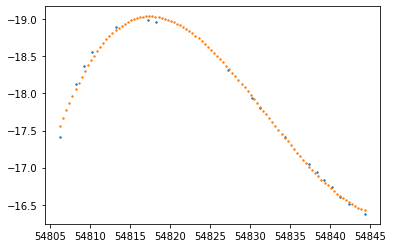

-19.235122680664062 1.4778289794921875 54816.41350823772 0.9876814743838731


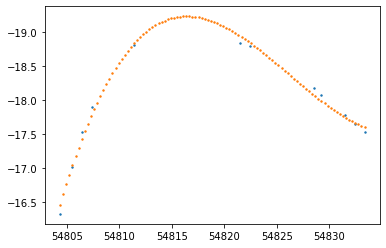

-17.62035369873047 1.2648277282714844 55691.24228957932 0.9952819096514137


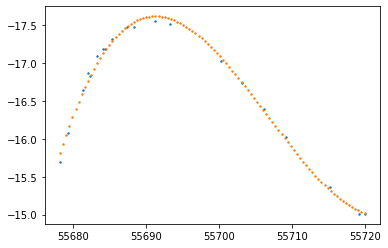

-17.59499740600586 1.1879043579101562 55691.28614127045 0.9977504821726386


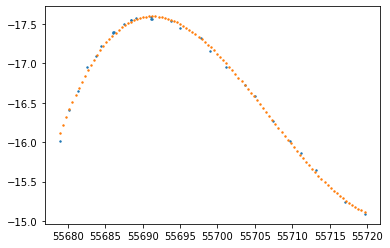

-17.935638427734375 1.388275146484375 55815.59322847042 0.9758069005906949


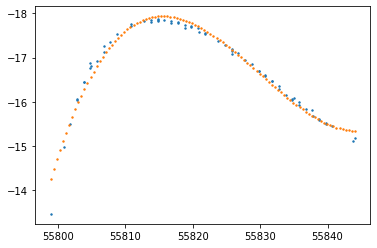

-17.862808227539062 1.431488037109375 55815.53625002786 0.9821682299968814


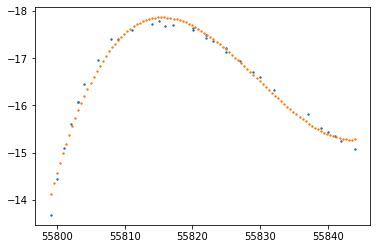

-17.92852020263672 1.48211669921875 55815.30969506337 0.9760619943288263


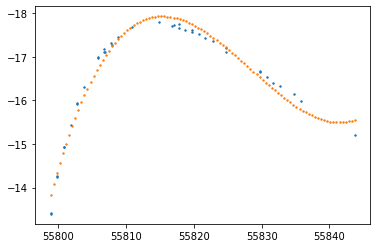

-17.82672119140625 -0.544891357421875 55812.730834940776 0.9952506921564442


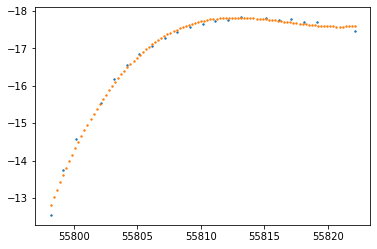

-16.985977172851562 1.2955703735351562 56082.78407654706 0.9725294915467722


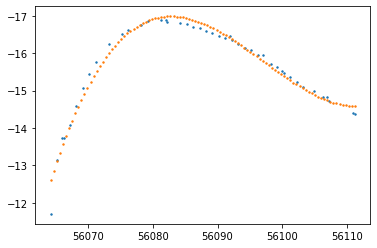

-16.86577606201172 1.0124588012695312 56082.381516181595 0.9988520866241888


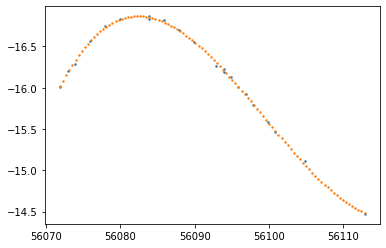

-16.93927764892578 0.8861846923828125 56081.04322297581 0.9968859729584155


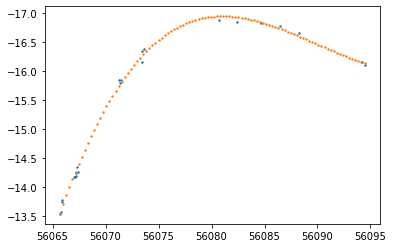

-19.980361938476562 1.1738128662109375 56244.63856504506 0.9481976221086137


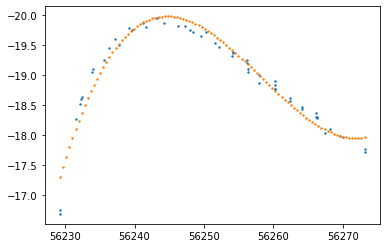

-20.06243133544922 1.2491836547851562 56244.04563942539 0.9275240881253428


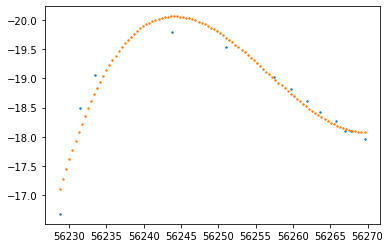

-19.903797149658203 1.0273933410644531 56243.95122161964 0.9806354729170675


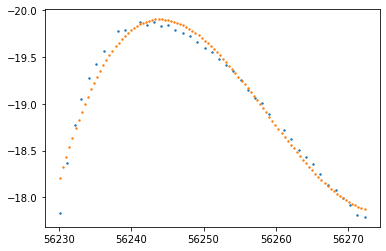

-19.957103729248047 1.125030517578125 56244.21961140031 0.9641701210450233


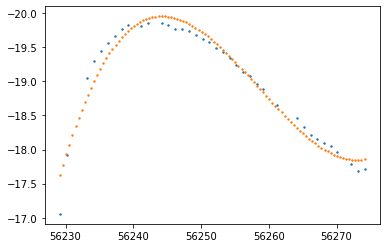

-17.931427001953125 1.4649276733398438 56295.87159994777 0.9910354108500044


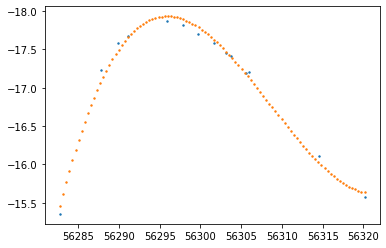

-17.902435302734375 1.39373779296875 56296.25441447535 0.9924472114697022


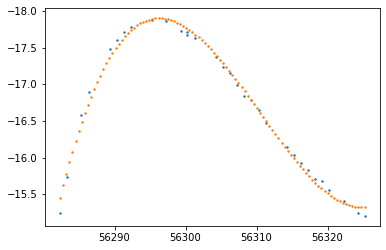

-18.358367919921875 1.4148597717285156 56528.93856627682 0.9879245354593078


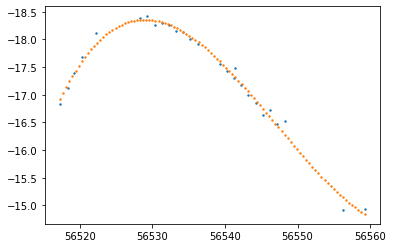

-18.642066955566406 1.3179397583007812 56528.69643530347 0.988801127627324


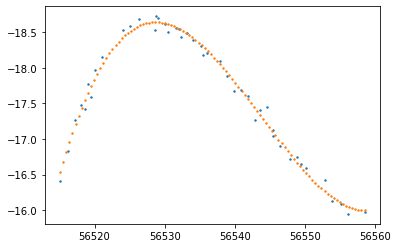

-19.057090759277344 1.4416427612304688 56648.64978601443 0.9945813510634176


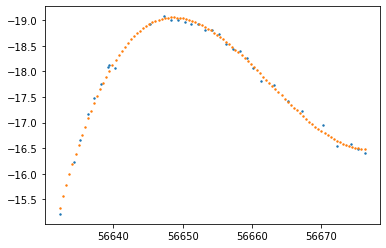

-19.165390014648438 1.5020370483398438 56648.5791303302 0.9958069487567592


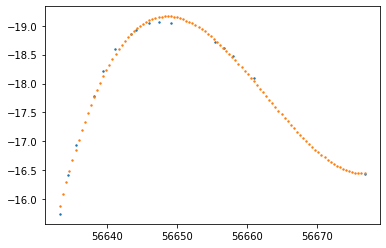

-18.395187377929688 1.4985580444335938 57107.36654776084 0.9860252694903578


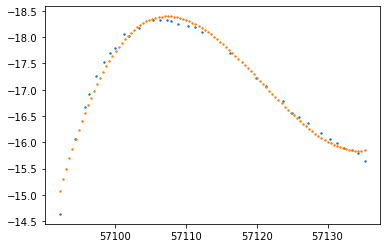

-18.558212280273438 1.4881439208984375 57106.97111040237 0.9868952038479378


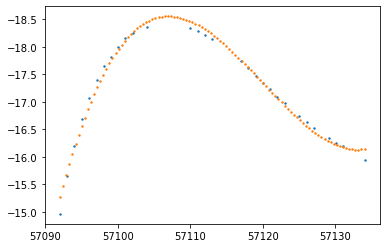

-18.3682861328125 1.57354736328125 57548.27005376114 0.9923082906512387


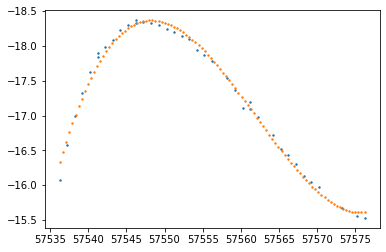

-17.88214874267578 1.1150856018066406 57709.66185242889 0.9953911218390744


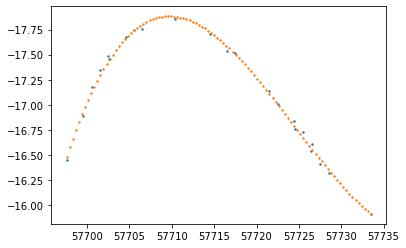

-14.780204772949219 1.3084487915039062 57890.47110287633 0.9935056203290417


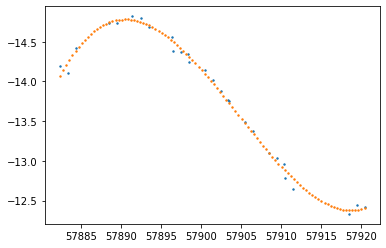

-18.549110412597656 1.255340576171875 57935.16222924518 0.9911819393337068


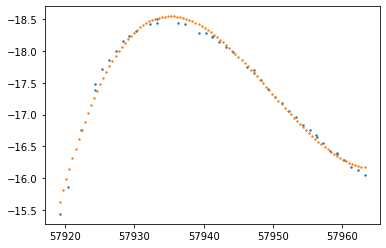

-19.426496505737305 0.7256374359130859 58045.68124561917 0.9941783377333921


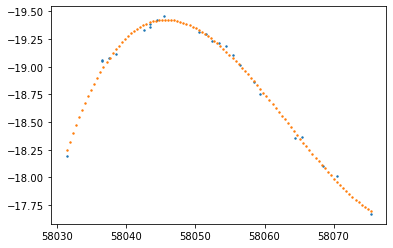

-18.902450561523438 0.9408988952636719 58150.00272917326 0.9975787623935282


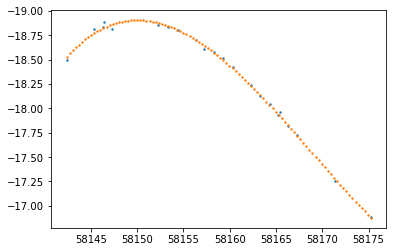

0.9903322866238842


In [147]:
# Philips relation

M = []
dm_P = []
fitting_days = 30
avgR2 = 0

for i in range(len(Succ_graph)): # Loop through all SN
    maximum = np.argmin(Magnitude_Abs[Succ_graph[i]]) # Obtain the id of the maximum magnitude
    peak_time = Time[Succ_graph[i]][maximum] # Save the day of maximum magnitude
    tail_time = Time[Succ_graph[i]][maximum] # Save the day of the end of the initial lightcurve fall off
        
    # Calculate the day of the end of the initial lightcurve fall off
    j = 0
   
    if (peak_time + fitting_days) < Time[Succ_graph[i]][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
        while tail_time < (peak_time + fitting_days):
            tail_time = Time[Succ_graph[i]][maximum + j]
            if tail_time > (peak_time + fitting_days):
                break
            j += 1
        
        # Save the peaking part of the light curve (include the rising, peak, and 15 days after the peak)
        t = Time[Succ_graph[i]][:maximum + j]
        m = Magnitude_Abs[Succ_graph[i]][:maximum + j]
        
        # Polynomial (degree = 3) fit of the peak part of the light curve 
        P = np.poly1d(np.polyfit(t, m, deg = 3))
        P_max = (-1*P[2] + ((P[2])**2 - 3*P[3]*P[1])**(1/2))/(3*P[3])
        
        if (not math.isnan(P_max)):
            M.append(P(P_max))
            dm_P.append(P(P_max + 15) - P(P_max))
            print(M[-1], dm_P[-1], P_max, r2_score(m, P(t)))
            avgR2 += r2_score(m, P(t))
            
            x = np.linspace(t[0], t[-1], 100)
            plt.gca().invert_yaxis()
            plt.scatter(t, m, s=2)
            plt.scatter(x, P(x), s=2)
            plt.show()

print(avgR2/len(M))

 
-0.05689 x - 18.26
0.0003792667860988974


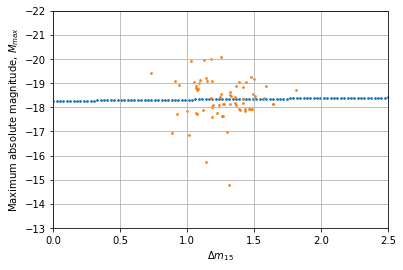

In [148]:
# Plot the Philips relation

P1 = np.poly1d(np.polyfit(dm_P, M, deg = 1))
print(P1)
print(r2_score(M, P1(dm_P)))

# Plot out the linear relationship
plt.gca().invert_yaxis()
plt.xlabel('$\Delta m_{15}$')
plt.ylabel('Maximum absolute magnitude, $M_{max}$')
plt.grid()
plt.xlim(0, 2.5)
plt.ylim(-13, -22)
x = np.linspace(0, 2.5, 100)
plt.scatter(x, P1(x), s=3)
plt.scatter(dm_P, M, s=3)